### Задание №4. Итоговый проект

In [3]:
import numpy as np
import pandas as pd


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('kc_house_data.csv')
df.sample(n=10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2198,3815500045,20141003T000000,399000.0,3,2.25,1880,12473,1.0,0,0,...,8,1420,460,1958,0,98028,47.7623,-122.256,2300,10469
4974,280610020,20140902T000000,825000.0,4,3.25,4110,14219,2.0,0,2,...,10,2570,1540,1979,0,98028,47.7382,-122.264,2760,12283
14858,3626039268,20140516T000000,540000.0,1,1.00,1140,6700,1.5,0,0,...,7,1140,0,1920,0,98103,47.6958,-122.357,1350,6700
21167,8856003839,20141210T000000,215000.0,3,2.50,1322,6006,2.0,0,0,...,7,1322,0,2009,0,98001,47.2706,-122.254,1440,6796
16376,9323600380,20140805T000000,817000.0,4,2.25,2600,10660,2.0,0,0,...,8,2600,0,1979,0,98006,47.5533,-122.156,3150,10660
12228,6708200320,20140929T000000,599000.0,4,4.75,3700,11000,1.0,0,0,...,7,1840,1860,1962,0,98028,47.7680,-122.251,1720,11564
9682,3834000400,20141119T000000,415000.0,3,1.00,1630,8146,1.0,0,0,...,7,1630,0,1952,0,98125,47.7293,-122.290,1480,8146
15433,2254501440,20150421T000000,546000.0,4,3.00,1790,3600,1.5,0,0,...,8,1790,0,1901,0,98122,47.6117,-122.313,1770,3119
7471,8732020440,20150428T000000,297500.0,4,2.50,2190,8100,1.0,0,0,...,8,1250,940,1978,0,98023,47.3131,-122.392,2100,8840
6867,525069099,20141022T000000,685000.0,3,2.50,2320,219978,2.0,0,0,...,8,2320,0,1993,0,98053,47.6847,-122.064,2340,88862


#### Условие 1: Задача 1
##### Постройте график. Назовите график. Сделайте именование оси x и оси y. Сделайте выводы

Text(0.5, 1.0, 'Mean price by condition')

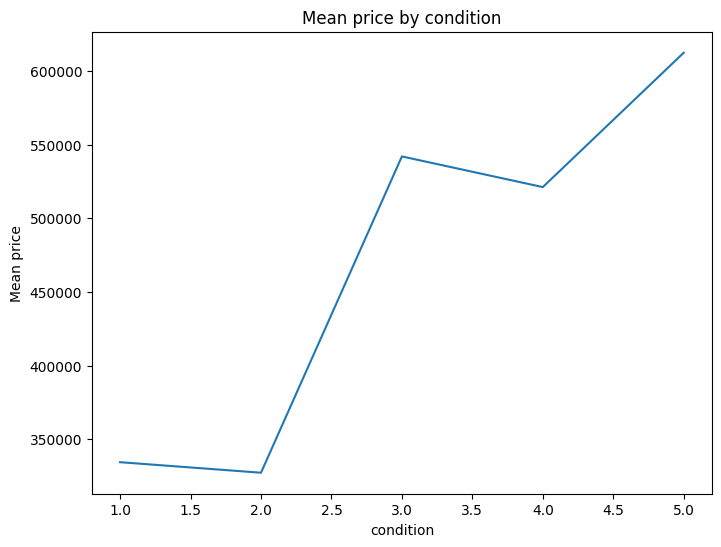

In [84]:
plt.figure(figsize=(8,6))
data = df.groupby('condition').agg({'price':['mean']})
plt.plot(data['price'])
plt.xlabel('condition')
plt.ylabel('Mean price')
plt.title('Mean price by condition')

##### Вывод: с улучшением состояния дома, цена в среднем возрастает.

##### 1.2 Изучите стоимости недвижимости

Text(0.5, 1.0, 'Price hist')

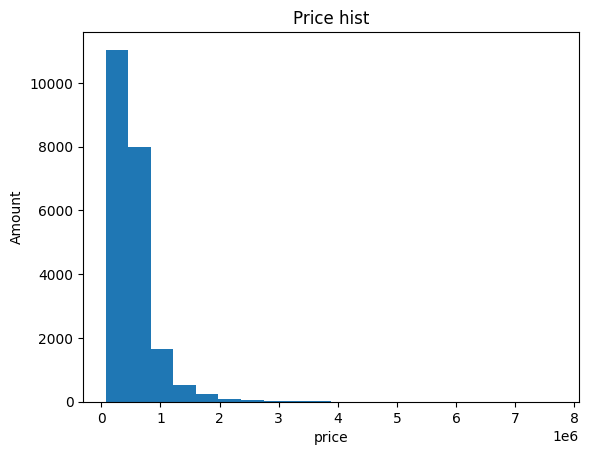

In [93]:
#plt.figure(figsize=(6,8))
plt.hist(df['price'],bins=20)
plt.xlabel('price')
plt.ylabel('Amount')
plt.title('Price hist')

Text(0.5, 1.0, 'Распределение цен на дома')

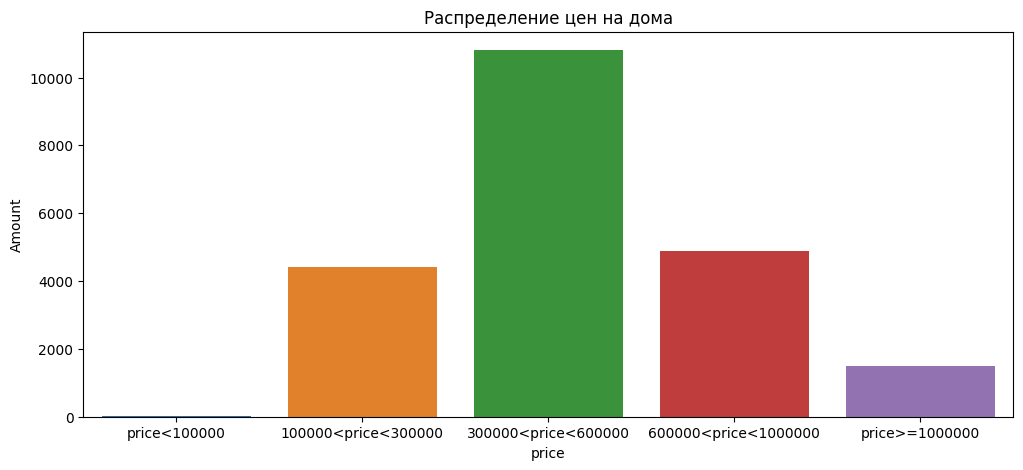

In [133]:
data = pd.Series({'amount':[df[(df['price']<100000) & (df['price']>0)]['price'].count(),
                  df[(df['price']<300000) & (df['price']>=100000)]['price'].count(),
                  df[(df['price']<600000) & (df['price']>=300000)]['price'].count(),
                  df[(df['price']<1000000) & (df['price']>=600000)]['price'].count(),
                  df[df['price']>=1000000]['price'].count()],'price':['price<100000','100000<price<300000',
                                                                      '300000<price<600000',
                                                                      '600000<price<1000000',
                                                                      'price>=1000000'
                  ]
                  })
plt.figure(figsize=(12,5))
plt.xlabel('price')
plt.ylabel('Amount')
sns.barplot(data,x='price',y='amount')
plt.title('Распределение цен на дома')


##### 1.3 Изучите распределение квадратуры жилой

Text(0.5, 1.0, 'Распределение квадратуры жилой площади')

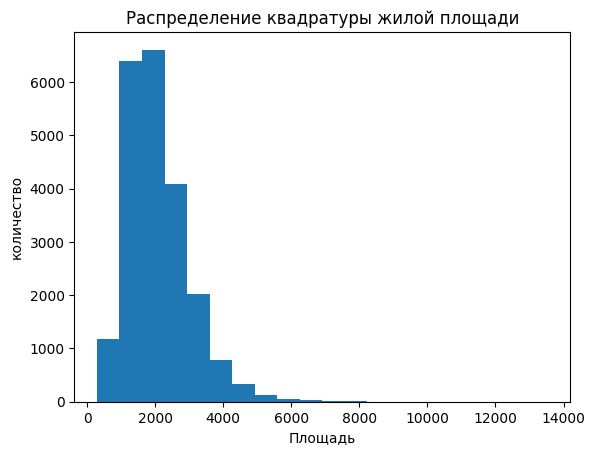

In [135]:
plt.hist(df['sqft_living'],bins=20)
plt.xlabel('Площадь')
plt.ylabel('количество')
plt.title('Распределение квадратуры жилой площади')

##### 1.4 Изучите распределение года постройки

Text(0.5, 1.0, 'Распределение по годам постройки')

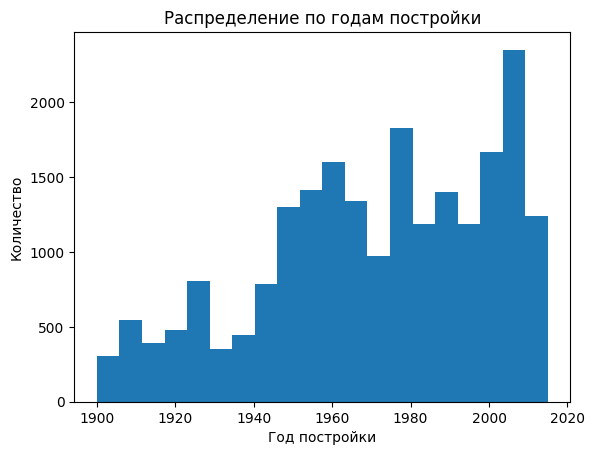

In [138]:
plt.hist(df['yr_built'],bins=20)
plt.xlabel('Год постройки')
plt.ylabel('Количество')
plt.title('Распределение по годам постройки')